# 심화 문제 4.1

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (15.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122352 files and dir

In [1]:
import matplotlib
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #한글 깨짐 방지
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn import linear_model  
from sklearn.metrics import r2_score

In [2]:
x = [130, 250, 190, 300, 210, 220, 170]
y = [16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2]

df = pd.DataFrame(
    {'마력':x, '연비':y}
)
df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [3]:
df

,마력,연비
A,130,16.3
B,250,10.2
C,190,11.1
D,300,7.1
E,210,12.1
F,220,13.2
G,170,14.2


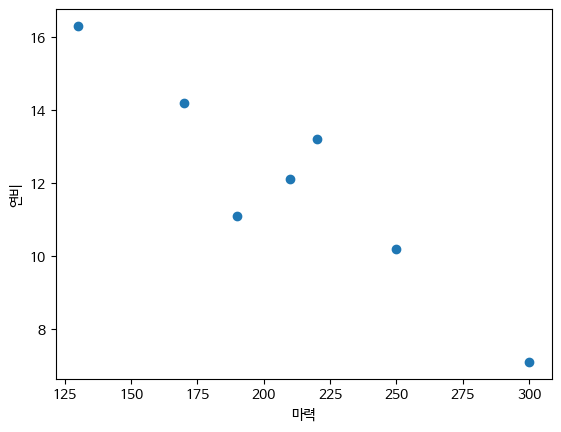

In [4]:
plt.scatter( df['마력'], df['연비'])
plt.xlabel('마력')
plt.ylabel('연비')
plt.show()

In [5]:
x = df['마력'].to_numpy()
y = df['연비'].to_numpy()
x = x[:, np.newaxis]    
print(x)

[[130]
 [250]
 [190]
 [300]
 [210]
 [220]
 [170]]


In [6]:
regr = linear_model.LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)
r2score = r2_score(y, y_pred)

### 문제 1) 출력 값

In [7]:
print('계수:', regr.coef_) 
print('절편:',regr.intercept_) 
print('예측점수:',r2score)

계수: [-0.05027473]
절편: 22.58626373626374
예측점수: 0.8706727649378526


In [8]:
pred_=regr.predict([[270]])


In [9]:
pred_round = round(float(pred_), 2)

### 문제 2) 출력 값

In [10]:
print('270 마력 자동차의 예상 연비:',pred_round,'km/l' )

270 마력 자동차의 예상 연비: 9.01 km/l


# 심화 문제 4.2

In [11]:
HP = [130, 250, 190, 300, 210, 220, 170]
W = [1900, 2600, 2200, 2900, 2400, 2300, 2100]
E = [16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2]

df_2 = pd.DataFrame(
    {'마력':HP,'총중량':W, '연비':E}
)
df_2.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [12]:
df_2

,마력,총중량,연비
A,130,1900,16.3
B,250,2600,10.2
C,190,2200,11.1
D,300,2900,7.1
E,210,2400,12.1
F,220,2300,13.2
G,170,2100,14.2


In [13]:
X = list(zip(HP, W)) #X = df_2[['마력','총중량']], E = df_2['연비'] 이렇게 해도됨!!!!!!!!!!

In [14]:
regr_2 = linear_model.LinearRegression()
regr_2.fit(X, E)
e_pred = regr_2.predict(X)
r2score_2 = r2_score(E, e_pred)

### 문제 1) 출력 값

In [15]:
print('계수:', regr_2.coef_) 
print('절편:',regr_2.intercept_) 
print('예측점수:',r2score_2)

계수: [-0.00689189 -0.00731081]
절편: 30.60405405405405
예측점수: 0.8871254041192396


In [16]:
pred_2=regr_2.predict([[270, 2500]])

In [17]:
pred_round_2 = round(float(pred_2), 2)

### 문제 2) 출력 값

In [18]:
print('270 마력 2500kg 자동차의 예상 연비:',pred_round_2,'km/l' )

270 마력 2500kg 자동차의 예상 연비: 10.47 km/l


In [19]:
import seaborn as sns    

### 문제 3)

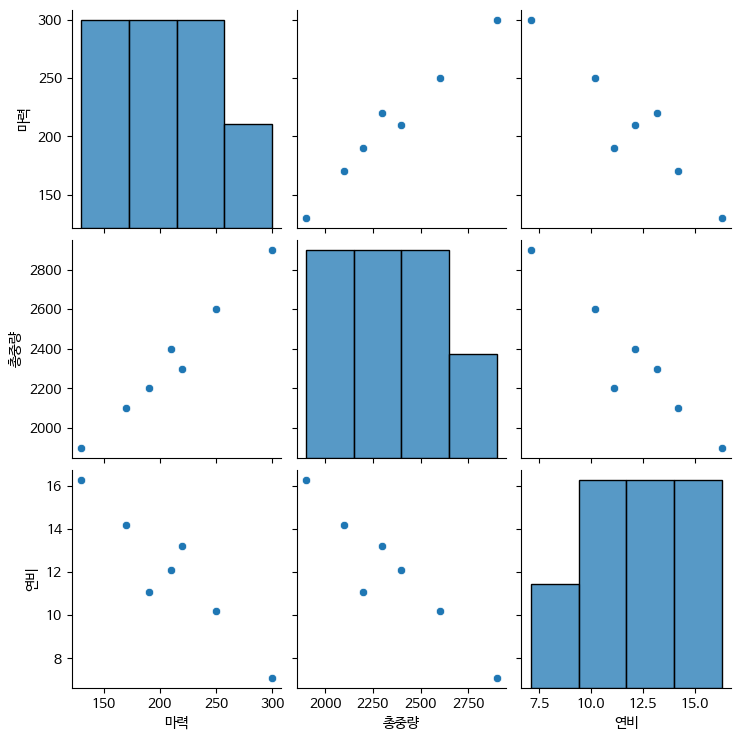

In [20]:
sns.pairplot(df_2[['마력','총중량', '연비']])

### 문제 4) 

/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


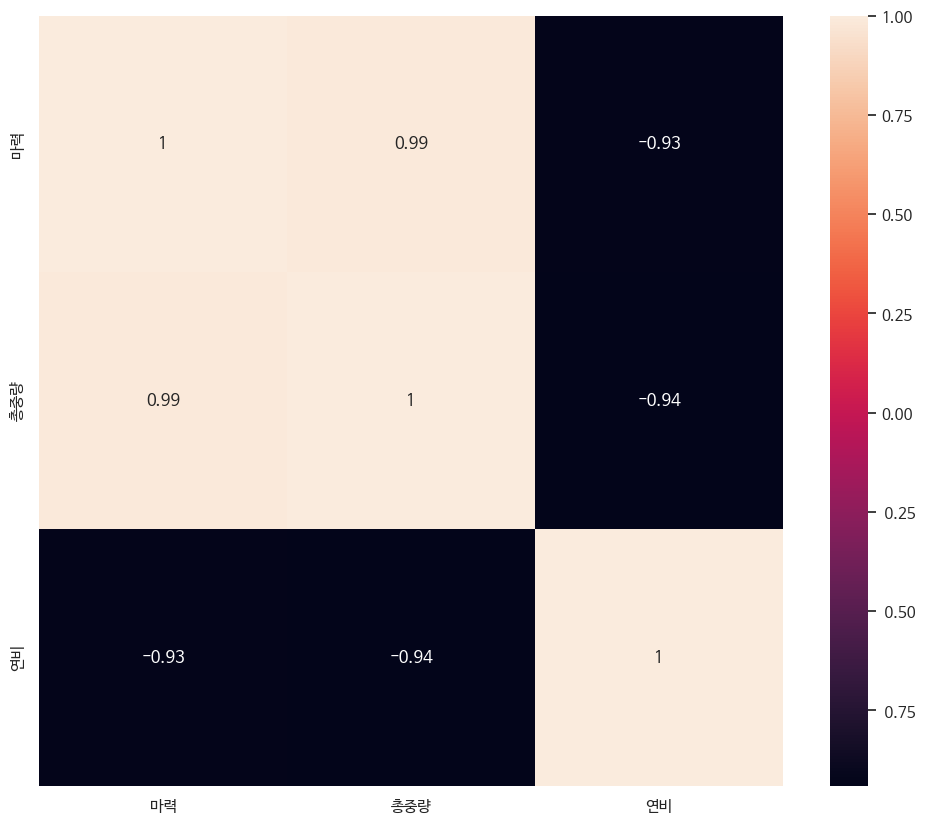

In [21]:
sns.set(rc={'figure.figsize':(12,10)},font='NanumBarunGothic')   
correlation_matrix = df_2.corr().round(2) 
sns.heatmap(data=correlation_matrix, annot=True)


### 문제 5) 답

- 마력이 강할수록 총중량도 커진다
- 마력이 강할수록, 연비가 낮다
- 총중량이 클수록, 연비가 낮다